<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Class_Code/Intro_to_Comp_Statistics_Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Statistics (HSSP 2023 Edition)
## Day 6: Statistical Analysis Day 2

In this notebook, we will look at a working statistical program and outline a report/presentation.

In [ ]:
# Pseudocode

# Import packages

# Load in data

# Select features
# Q: High school GPA and SAT scores vs. College GPA
# Features: High school GPA, SAT scores, College GPA
# Method: Linear regression

# Q: Number of years to graduate vs. other features
# Features: High school GPA, Parental level of education, Parental income, years to graduate
# Method: Linear regression, Analysis of variance?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy.stats import norm
from scipy.stats import chi2
import scipy.stats as stats
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Suppress warnings

### Performing Data Analysis

Research Question: Is there a statistically significant association between gender, education level, and years of experience with salary?

Getting Dataset from Kaggle:

1. Sign in to Kaggle (make a free account if you have not already)

2. Go to https://www.kaggle.com/datasets/rkiattisak/graduation-rate and download the dataset

3. Unzip the file and load dataset into Google Colab

In [2]:
# Load in data
df = pd.read_csv("graduation_rate.csv")

# Get first five rows of dataset
df.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [4]:
# Rename columns
df = df.rename(columns = {'ACT composite score' : 'ACT', 'SAT total score': 'SAT',
                          'parental level of education': 'parental_education',
                          'parental income' : 'parental_income',
                          'high school gpa' : 'HS_GPA',
                          'college gpa' : 'College_GPA',
                          'years to graduate' : 'years'})

# Get first five rows of dataset
df.head()

,ACT,SAT,parental_education,parental_income,HS_GPA,College_GPA,years
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


First, we will perform ordinary least-squares regression (similar to simple linear regression) using all of the datapoints. We will then calculate the confidence intervals for the slope.

In [9]:
# Perform simple linear regression
model = 'years ~ ACT + SAT' # Adjust features
ols_model = sm.ols(formula = model, data = df)
results = ols_model.fit()

# Display results
results.params

Intercept    6.564064
ACT          0.042767
SAT         -0.001403
dtype: float64

In [8]:
# Intercept and Slope 95% confidence intervals
results.conf_int(alpha = 0.05)

,0,1
Intercept,5.296415,7.831712
ACT,-0.026438,0.111971
SAT,-0.002726,-0.000079


Next, we will use bootstrapping to sample (with replacement) the data and fit its respective slopes. Let's start with getting one sample.

In [11]:
# Sample a portion of the dataset
sample = df.sample(n = df.shape[0], replace = True)

# Perform linear regression on sample
ols_model_boot = sm.ols(formula = model, data = sample)
results_boot = ols_model_boot.fit()

# Display results
results_boot.params

Intercept    6.186811
ACT          0.058363
SAT         -0.001423
dtype: float64

If you were to rerun the code above, you will get a different value every time. We can make the results reproducible by setting a seed. This is done by setting the random_state parameter to a particular value.

In [12]:
# Sample with replacementfrom the dataset
sample = df.sample(n = df.shape[0], replace = True, random_state = 0)

# Perform linear regression on sample
ols_model_boot = sm.ols(formula = model, data = sample)
results_boot = ols_model_boot.fit()

# Display results
results_boot.params

Intercept    6.227964
ACT          0.013645
SAT         -0.000798
dtype: float64

To generate the bootstrap 95% confidence interval and display a histogram of our results, we can first create an array to store the results. Then, we can sample from our dataset, perform a fit, and record the results. Finally, we can plot the results and compute the confidence interval.

In [13]:
# Dataframe to store results
# Modify based on features selected
boot_results = pd.DataFrame({'Intercept' : [], 'ACT' : [], 'SAT' : []})

# Number of iterations
B = 1000 # (1000 takes about 45 seconds to run, 10000 about 6 minutes)

# Perform bootstrapping
for b in range(B):

  # Sample a portion of the dataset
  sample = df.sample(n = df.shape[0], replace = True, random_state = b) # Set random state to b for reproducibility

  # Perform linear regression on sample
  ols_model_boot = sm.ols(formula = model, data = sample)
  results_boot = ols_model_boot.fit()

  # Append results
  boot_results = boot_results.append(results_boot.params[0:7], ignore_index = True)

  # Keep track of progress for every 100 iterations
  if (b % 100 == 0):
    print(b)

0
100
200
300
400
500
600
700
800
900


Text(0, 0.5, 'Frequency')

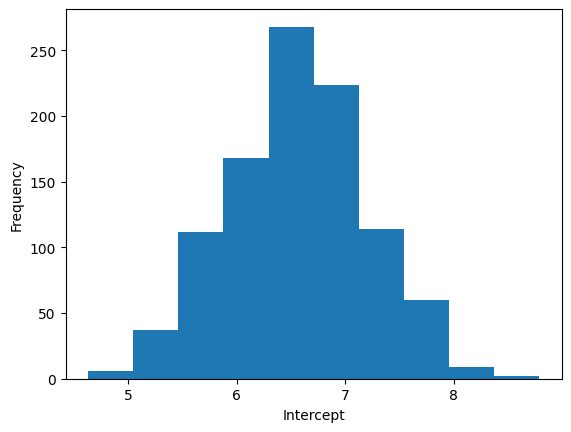

In [14]:
# Basic histogram of intercept
plt.hist(boot_results.iloc[:,0])
plt.xlabel(boot_results.columns[0])
plt.ylabel("Frequency")

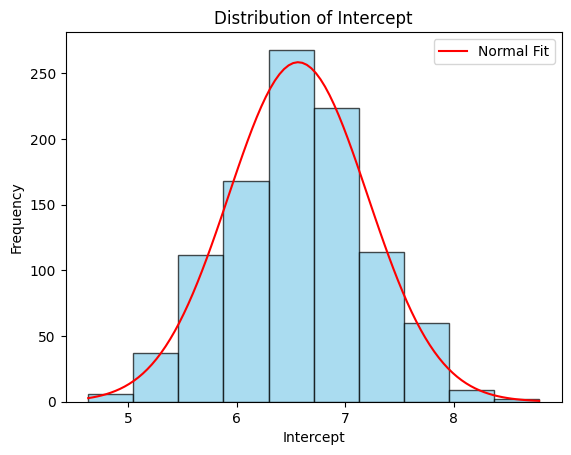

In [15]:
# Code generated by ChatGPT
def plot_histogram_with_fit(data, num_bins=10, xlabel=None, ylabel=None, title=None):
    """
    Plots a histogram with a normal distribution fit overlay.

    Parameters:
        data (list or numpy array): The input data for the histogram and fit.
        num_bins (int): Number of bins for the histogram. Default is 10.
        xlabel (str): Label for the x-axis. Default is None.
        ylabel (str): Label for the y-axis. Default is None.
        title (str): Title for the plot. Default is None.

    Returns:
        None
    """
    # Create the histogram
    n, bins, patches = plt.hist(data, bins=num_bins, alpha=0.7, edgecolor='black', color='skyblue')

    # Get the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # Generate normal distribution data points for the overlay
    x = np.linspace(min(data), max(data), 100)
    y = norm.pdf(x, mean, std) * len(data) * (bins[1] - bins[0])  # Scaling to match the histogram

    # Plot the normal distribution fit
    plt.plot(x, y, 'r-', label='Normal Fit')

    # Set labels and title
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)

    # Show the plot with the legend
    plt.legend()
    plt.show()

plot_histogram_with_fit(boot_results.iloc[:,0], num_bins=10, xlabel=boot_results.columns[0], ylabel='Frequency', title='Distribution of ' + boot_results.columns[0])


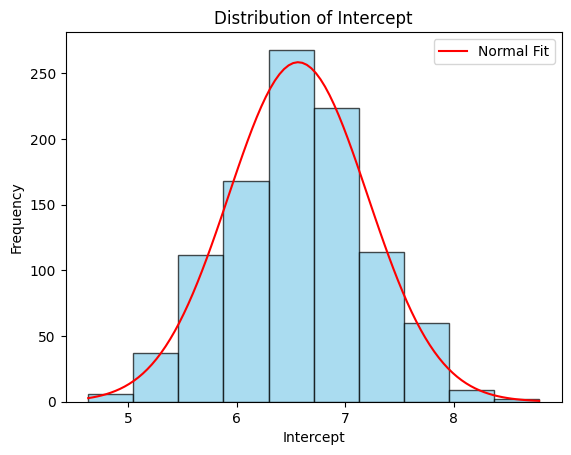

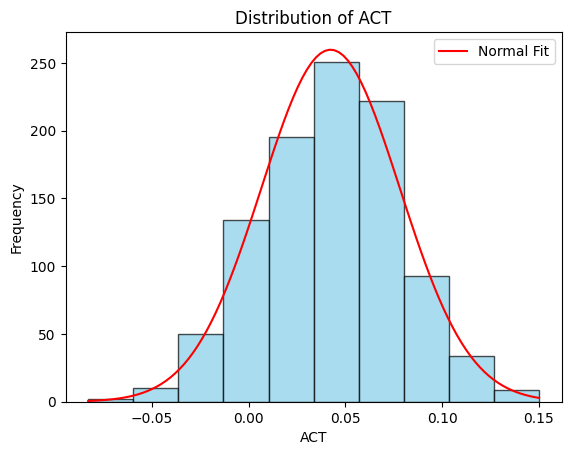

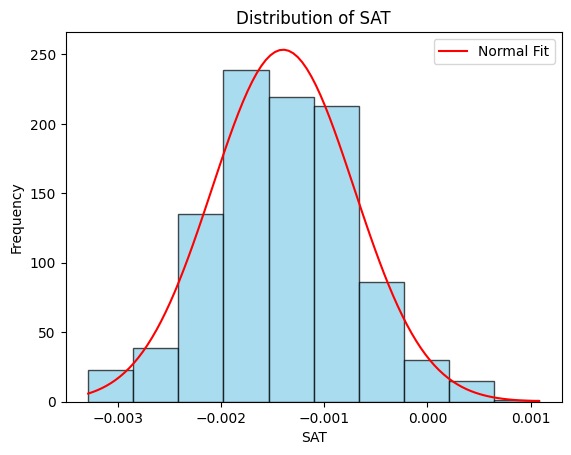

In [16]:
# Plot all histograms
for i in range(boot_results.shape[1]):
  plot_histogram_with_fit(boot_results.iloc[:,i], num_bins=10, xlabel=boot_results.columns[i], ylabel='Frequency', title='Distribution of ' + boot_results.columns[i])


In [17]:
# Generate confidence intervals
# Select significance level
alpha = 0.05

for i in range(boot_results.shape[1]):
  print(str(round(1 - alpha, 2)*100) + "% Confidence interval for " + str(boot_results.columns[i]) + ": [" +
  str(np.nanpercentile(boot_results.iloc[:,i], alpha/2 * 100)) + ", " +
  str(np.nanpercentile(boot_results.iloc[:,i], 100 - alpha/2 * 100)) + "]")

# Compare with original result
# Intercept and Slope 95% confidence intervals
results.conf_int(alpha)

95.0% Confidence interval for Intercept: [5.270747162272081, 7.837822080582371]
95.0% Confidence interval for ACT: [-0.02756252851938894, 0.11343427353534906]
95.0% Confidence interval for SAT: [-0.002807522991318941, 4.063819473821881e-05]


,0,1
Intercept,5.296415,7.831712
ACT,-0.026438,0.111971
SAT,-0.002726,-0.000079
